In [54]:
import pandas as pd
from lshash.lshash import LSHash
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import mixture

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('trade.csv')

vipno = data['vipno'].tolist()
vipno = list(set(vipno))
print(len(vipno))
pluno = data['pluno'].tolist()
pluno = list(set(pluno))
frame = pd.DataFrame(index=pluno, columns=vipno)

frame.fillna(0, inplace=True)

for index, row in data.iterrows():
        frame.at[row['pluno'],row['vipno']] = frame.at[row['pluno'],row['vipno']] + round(row['amt'])

298


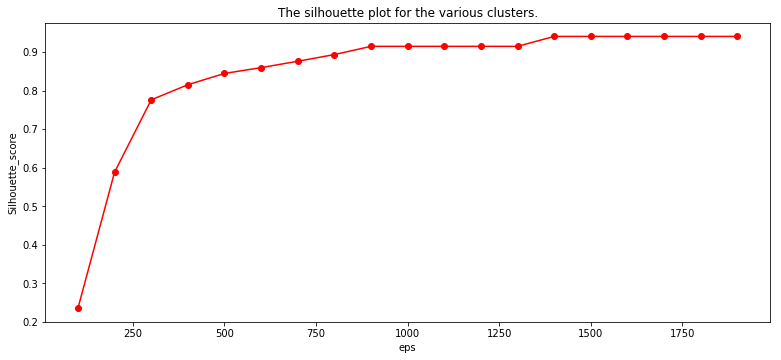

In [51]:
lsh = LSHash(3, 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#做出平均轮廓系数随eps增大而变化的图像
plt.figure(figsize=(13, 5.5))
x = []
y = []
eps=100 
while(eps < 2000):
    #计算当前eps下的dbscan聚类结果
    db_labels = DBSCAN(eps=eps).fit_predict(frame.T)
    #求出平均轮廓系数
    silhouette_avg = silhouette_score(frame.T, db_labels)
    x.append(eps)
    y.append(silhouette_avg)
    eps = eps + 100
plt.plot(x, y, color='red', marker='o', linestyle='solid')
plt.title("The silhouette plot for the various clusters.")
plt.xlabel("eps")
plt.ylabel("Silhouette_score")
plt.show()

In [61]:
lsh = LSHash(3, 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

#使用dbscan得到聚类
db_labels = DBSCAN(eps=eps).fit_predict(frame.T)

print(db_labels)

#对每一个vipno计算前5个knn是否和它位于同一个聚类，如果不是同一个聚类则输出false
for x in range(298):
    k = 0
    a = lsh.query(frame.T.iloc[x].tolist(),6)

    label = db_labels[x]
    for i in a[1:]:
        if(db_labels[vipno.index(i[0][1])] != label):
            print('false')

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
false
false
false
false
false


In [62]:
#eps = 1400时DBscan的聚类结果
dbscan = DBSCAN(eps=1400).fit(frame.T)

db_labels = dbscan.labels_
print(db_labels)
silhouette_avg = silhouette_score(frame.T, db_labels)
print(silhouette_avg)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
0.9405452116338006


In [63]:
#k=2时使用KMeans得到聚类结果
kmeans = KMeans(n_clusters=2).fit(frame.T)

kmeans_labels = kmeans.labels_
silhouette_avg = silhouette_score(frame.T, kmeans_labels)
print(kmeans_labels)
print(silhouette_avg)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
0.9405452116338006


In [64]:
#使用sklearn中的函数对比两个聚类结果的调整兰德指数
print(metrics.adjusted_rand_score(db_labels, kmeans_labels)) 
#使用sklearn中的函数对比两个聚类结果的同质性、完整性和它们的加权平均
print(metrics.homogeneity_completeness_v_measure(db_labels, kmeans_labels))
#使用sklearn中的函数对比两个聚类结果的互信息
print(metrics.adjusted_mutual_info_score(db_labels, kmeans_labels))

1.0
(1.0, 1.0, 1.0)
1.0
